In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(array([ 1.,  0.,  0.,  0.,  0.,  2.,  4.,  0.,  2.,  3.,  4.,  3., 10.,
         8.,  8., 11.,  8.,  7.,  5.,  7.,  5.,  7., 12., 13.,  0.,  8.,
        16.,  8., 11., 17., 19., 14., 11.,  8., 11.,  9., 10.,  8.,  7.,
         9.,  4.,  3.,  4.,  3.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([29.  , 29.96, 30.92, 31.88, 32.84, 33.8 , 34.76, 35.72, 36.68,
        37.64, 38.6 , 39.56, 40.52, 41.48, 42.44, 43.4 , 44.36, 45.32,
        46.28, 47.24, 48.2 , 49.16, 50.12, 51.08, 52.04, 53.  , 53.96,
        54.92, 55.88, 56.84, 57.8 , 58.76, 59.72, 60.68, 61.64, 62.6 ,
        63.56, 64.52, 65.48, 66.44, 67.4 , 68.36, 69.32, 70.28, 71.24,
        72.2 , 73.16, 74.12, 75.08, 76.04, 77.  ]),
 <a list of 50 Patch objects>)

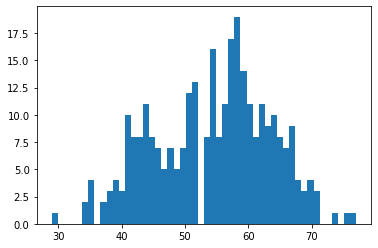

In [7]:
plt.hist(df['age'],bins=50)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


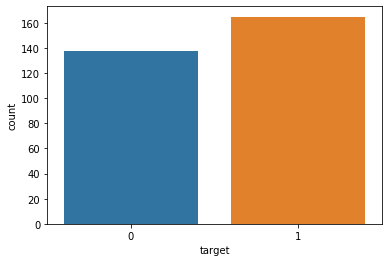

In [6]:
#check for data is balanced or unbalanced
a = df["target"]
sns.countplot(a)

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("target",axis=1)
y = df["target"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

**Logistic Regression**

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,log_pred))
print(confusion_matrix(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.83      0.96      0.89        47

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91

[[35  9]
 [ 2 45]]


**Naive Bayes**

In [10]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

nb_pred = nb.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,nb_pred))
print(confusion_matrix(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.83      0.85      0.84        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

[[36  8]
 [ 7 40]]


**Support Vector Machine**

In [12]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.52      1.00      0.68        47

    accuracy                           0.52        91
   macro avg       0.26      0.50      0.34        91
weighted avg       0.27      0.52      0.35        91

[[ 0 44]
 [ 0 47]]


/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
#Gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished
/Users/jaydip/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [15]:
grid_pred = grid.predict(X_test)

In [16]:
print(classification_report(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        44
           1       0.65      0.70      0.67        47

    accuracy                           0.65        91
   macro avg       0.65      0.65      0.65        91
weighted avg       0.65      0.65      0.65        91

[[26 18]
 [14 33]]


**K Nearest Neighbors**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [18]:
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56        44
           1       0.60      0.68      0.64        47

    accuracy                           0.60        91
   macro avg       0.60      0.60      0.60        91
weighted avg       0.60      0.60      0.60        91

[[23 21]
 [15 32]]


In [19]:
#choosing k value

error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

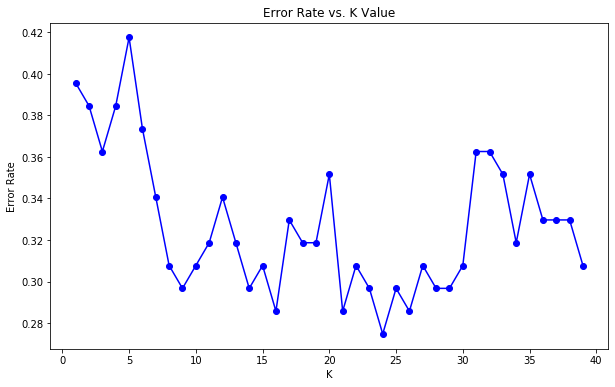

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
#with k=24
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(X_train,y_train)
pred_k = knn.predict(X_test)

print(confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

[[31 13]
 [12 35]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        44
           1       0.73      0.74      0.74        47

    accuracy                           0.73        91
   macro avg       0.73      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91



**Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

In [23]:
print(classification_report(y_test,dtree_pred))
print(confusion_matrix(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        44
           1       0.75      0.91      0.83        47

    accuracy                           0.80        91
   macro avg       0.82      0.80      0.80        91
weighted avg       0.82      0.80      0.80        91

[[30 14]
 [ 4 43]]


In [24]:
#Training the Random Forest model

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [25]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79        44
           1       0.78      0.85      0.82        47

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[33 11]
 [ 7 40]]


**Neural Network**

In [26]:
X = df.drop("target",axis=1).values
y = df["target"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)


#scaling data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Create Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [28]:
model = Sequential()

model.add(Dense(units=14,activation='relu'))
model.add(Dense(units=7,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
#Training the Model

model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test, y_test),verbose=1)

Train on 212 samples, validate on 91 samples
Epoch 1/600
212/212 [==============================] - 1s 7ms/sample - loss: 0.7064 - val_loss: 0.6853
Epoch 2/600
212/212 [==============================] - 0s 524us/sample - loss: 0.6999 - val_loss: 0.6798
Epoch 3/600
212/212 [==============================] - 0s 590us/sample - loss: 0.6939 - val_loss: 0.6753
Epoch 4/600
212/212 [==============================] - 0s 532us/sample - loss: 0.6890 - val_loss: 0.6715
Epoch 5/600
212/212 [==============================] - 0s 533us/sample - loss: 0.6846 - val_loss: 0.6685
Epoch 6/600
212/212 [==============================] - 0s 522us/sample - loss: 0.6809 - val_loss: 0.6661
Epoch 7/600
212/212 [==============================] - 0s 537us/sample - loss: 0.6781 - val_loss: 0.6637
Epoch 8/600
212/212 [==============================] - 0s 526us/sample - loss: 0.6753 - val_loss: 0.6616
Epoch 9/600
212/212 [==============================] - 0s 521us/sample - loss: 0.6730 - val_loss: 0.6591
Epoch 10/600

Epoch 78/600
212/212 [==============================] - 0s 398us/sample - loss: 0.3775 - val_loss: 0.3599
Epoch 79/600
212/212 [==============================] - 0s 371us/sample - loss: 0.3765 - val_loss: 0.3589
Epoch 80/600
212/212 [==============================] - 0s 376us/sample - loss: 0.3750 - val_loss: 0.3575
Epoch 81/600
212/212 [==============================] - 0s 378us/sample - loss: 0.3732 - val_loss: 0.3573
Epoch 82/600
212/212 [==============================] - 0s 389us/sample - loss: 0.3724 - val_loss: 0.3569
Epoch 83/600
212/212 [==============================] - 0s 382us/sample - loss: 0.3711 - val_loss: 0.3554
Epoch 84/600
212/212 [==============================] - 0s 388us/sample - loss: 0.3697 - val_loss: 0.3545
Epoch 85/600
212/212 [==============================] - 0s 390us/sample - loss: 0.3692 - val_loss: 0.3536
Epoch 86/600
212/212 [==============================] - 0s 390us/sample - loss: 0.3676 - val_loss: 0.3531
Epoch 87/600
212/212 [========================

Epoch 155/600
212/212 [==============================] - 0s 417us/sample - loss: 0.3201 - val_loss: 0.3395
Epoch 156/600
212/212 [==============================] - 0s 393us/sample - loss: 0.3201 - val_loss: 0.3390
Epoch 157/600
212/212 [==============================] - 0s 411us/sample - loss: 0.3202 - val_loss: 0.3400
Epoch 158/600
212/212 [==============================] - 0s 387us/sample - loss: 0.3188 - val_loss: 0.3396
Epoch 159/600
212/212 [==============================] - 0s 389us/sample - loss: 0.3190 - val_loss: 0.3392
Epoch 160/600
212/212 [==============================] - 0s 387us/sample - loss: 0.3183 - val_loss: 0.3397
Epoch 161/600
212/212 [==============================] - 0s 398us/sample - loss: 0.3180 - val_loss: 0.3410
Epoch 162/600
212/212 [==============================] - 0s 398us/sample - loss: 0.3172 - val_loss: 0.3403
Epoch 163/600
212/212 [==============================] - 0s 399us/sample - loss: 0.3170 - val_loss: 0.3410
Epoch 164/600
212/212 [==============

212/212 [==============================] - 0s 331us/sample - loss: 0.2525 - val_loss: 0.3502
Epoch 309/600
212/212 [==============================] - 0s 294us/sample - loss: 0.2525 - val_loss: 0.3496
Epoch 310/600
212/212 [==============================] - 0s 292us/sample - loss: 0.2515 - val_loss: 0.3500
Epoch 311/600
212/212 [==============================] - 0s 380us/sample - loss: 0.2514 - val_loss: 0.3514
Epoch 312/600
212/212 [==============================] - 0s 388us/sample - loss: 0.2511 - val_loss: 0.3515
Epoch 313/600
212/212 [==============================] - 0s 316us/sample - loss: 0.2506 - val_loss: 0.3513
Epoch 314/600
212/212 [==============================] - 0s 385us/sample - loss: 0.2511 - val_loss: 0.3536
Epoch 315/600
212/212 [==============================] - 0s 313us/sample - loss: 0.2493 - val_loss: 0.3510
Epoch 316/600
212/212 [==============================] - 0s 310us/sample - loss: 0.2503 - val_loss: 0.3515
Epoch 317/600
212/212 [============================

212/212 [==============================] - 0s 332us/sample - loss: 0.1932 - val_loss: 0.3610
Epoch 461/600
212/212 [==============================] - 0s 334us/sample - loss: 0.1922 - val_loss: 0.3639
Epoch 462/600
212/212 [==============================] - 0s 328us/sample - loss: 0.1927 - val_loss: 0.3638
Epoch 463/600
212/212 [==============================] - 0s 295us/sample - loss: 0.1928 - val_loss: 0.3646
Epoch 464/600
212/212 [==============================] - 0s 346us/sample - loss: 0.1912 - val_loss: 0.3632
Epoch 465/600
212/212 [==============================] - 0s 451us/sample - loss: 0.1908 - val_loss: 0.3623
Epoch 466/600
212/212 [==============================] - 0s 492us/sample - loss: 0.1921 - val_loss: 0.3623
Epoch 467/600
212/212 [==============================] - 0s 470us/sample - loss: 0.1899 - val_loss: 0.3639
Epoch 468/600
212/212 [==============================] - 0s 490us/sample - loss: 0.1897 - val_loss: 0.3653
Epoch 469/600
212/212 [============================

Epoch 537/600
212/212 [==============================] - 0s 432us/sample - loss: 0.1671 - val_loss: 0.3735
Epoch 538/600
212/212 [==============================] - 0s 370us/sample - loss: 0.1671 - val_loss: 0.3729
Epoch 539/600
212/212 [==============================] - 0s 403us/sample - loss: 0.1663 - val_loss: 0.3740
Epoch 540/600
212/212 [==============================] - 0s 366us/sample - loss: 0.1664 - val_loss: 0.3746
Epoch 541/600
212/212 [==============================] - 0s 303us/sample - loss: 0.1659 - val_loss: 0.3755
Epoch 542/600
212/212 [==============================] - 0s 472us/sample - loss: 0.1661 - val_loss: 0.3782
Epoch 543/600
212/212 [==============================] - 0s 817us/sample - loss: 0.1664 - val_loss: 0.3768
Epoch 544/600
212/212 [==============================] - 0s 739us/sample - loss: 0.1663 - val_loss: 0.3781
Epoch 545/600
212/212 [==============================] - 0s 681us/sample - loss: 0.1654 - val_loss: 0.3745
Epoch 546/600
212/212 [==============

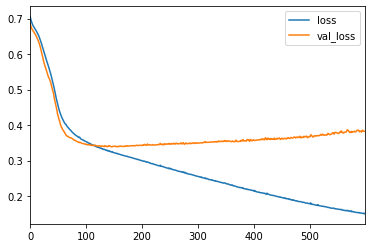

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [31]:
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=14,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
#wait 25 epochs after monitoring validation loss
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [33]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Train on 212 samples, validate on 91 samples
Epoch 1/600
212/212 [==============================] - 2s 8ms/sample - loss: 0.7333 - val_loss: 0.6969
Epoch 2/600
212/212 [==============================] - 0s 393us/sample - loss: 0.7076 - val_loss: 0.6803
Epoch 3/600
212/212 [==============================] - 0s 396us/sample - loss: 0.6919 - val_loss: 0.6674
Epoch 4/600
212/212 [==============================] - 0s 328us/sample - loss: 0.6797 - val_loss: 0.6564
Epoch 5/600
212/212 [==============================] - 0s 323us/sample - loss: 0.6694 - val_loss: 0.6478
Epoch 6/600
212/212 [==============================] - 0s 315us/sample - loss: 0.6611 - val_loss: 0.6402
Epoch 7/600
212/212 [==============================] - 0s 331us/sample - loss: 0.6537 - val_loss: 0.6327
Epoch 8/600
212/212 [==============================] - 0s 325us/sample - loss: 0.6468 - val_loss: 0.6252
Epoch 9/600
212/212 [==============================] - 0s 315us/sample - loss: 0.6405 - val_loss: 0.6178
Epoch 10/600

212/212 [==============================] - 0s 297us/sample - loss: 0.3505 - val_loss: 0.3290
Epoch 79/600
212/212 [==============================] - 0s 294us/sample - loss: 0.3503 - val_loss: 0.3289
Epoch 80/600
212/212 [==============================] - 0s 299us/sample - loss: 0.3488 - val_loss: 0.3288
Epoch 81/600
212/212 [==============================] - 0s 300us/sample - loss: 0.3477 - val_loss: 0.3287
Epoch 82/600
212/212 [==============================] - 0s 296us/sample - loss: 0.3476 - val_loss: 0.3284
Epoch 83/600
212/212 [==============================] - 0s 292us/sample - loss: 0.3469 - val_loss: 0.3278
Epoch 84/600
212/212 [==============================] - 0s 301us/sample - loss: 0.3468 - val_loss: 0.3278
Epoch 85/600
212/212 [==============================] - 0s 298us/sample - loss: 0.3456 - val_loss: 0.3272
Epoch 86/600
212/212 [==============================] - 0s 297us/sample - loss: 0.3441 - val_loss: 0.3268
Epoch 87/600
212/212 [==============================] - 0s 

Epoch 155/600
212/212 [==============================] - 0s 476us/sample - loss: 0.2977 - val_loss: 0.3222
Epoch 156/600
212/212 [==============================] - 0s 362us/sample - loss: 0.2973 - val_loss: 0.3224
Epoch 157/600
212/212 [==============================] - 0s 385us/sample - loss: 0.2960 - val_loss: 0.3227
Epoch 158/600
212/212 [==============================] - 0s 395us/sample - loss: 0.2963 - val_loss: 0.3224
Epoch 159/600
212/212 [==============================] - 0s 370us/sample - loss: 0.2952 - val_loss: 0.3224
Epoch 160/600
212/212 [==============================] - 0s 306us/sample - loss: 0.2935 - val_loss: 0.3238
Epoch 161/600
212/212 [==============================] - 0s 311us/sample - loss: 0.2933 - val_loss: 0.3247
Epoch 162/600
212/212 [==============================] - 0s 297us/sample - loss: 0.2938 - val_loss: 0.3250
Epoch 163/600
212/212 [==============================] - 0s 381us/sample - loss: 0.2915 - val_loss: 0.3253
Epoch 164/600
212/212 [==============

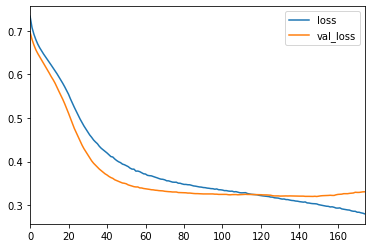

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [35]:
#Adding DropOut Layers
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop])

Train on 212 samples, validate on 91 samples
Epoch 1/600
212/212 [==============================] - 1s 7ms/sample - loss: 0.8616 - val_loss: 0.7166
Epoch 2/600
212/212 [==============================] - 0s 354us/sample - loss: 0.7875 - val_loss: 0.7064
Epoch 3/600
212/212 [==============================] - 0s 344us/sample - loss: 0.7875 - val_loss: 0.6987
Epoch 4/600
212/212 [==============================] - 0s 521us/sample - loss: 0.7539 - val_loss: 0.6922
Epoch 5/600
212/212 [==============================] - 0s 1ms/sample - loss: 0.7605 - val_loss: 0.6866
Epoch 6/600
212/212 [==============================] - 0s 701us/sample - loss: 0.6948 - val_loss: 0.6816
Epoch 7/600
212/212 [==============================] - 0s 841us/sample - loss: 0.7042 - val_loss: 0.6772
Epoch 8/600
212/212 [==============================] - 0s 1ms/sample - loss: 0.7188 - val_loss: 0.6742
Epoch 9/600
212/212 [==============================] - 0s 1ms/sample - loss: 0.7203 - val_loss: 0.6709
Epoch 10/600
212/2

Epoch 155/600
212/212 [==============================] - 0s 379us/sample - loss: 0.4746 - val_loss: 0.4508
Epoch 156/600
212/212 [==============================] - 0s 509us/sample - loss: 0.4743 - val_loss: 0.4493
Epoch 157/600
212/212 [==============================] - 0s 762us/sample - loss: 0.4822 - val_loss: 0.4490
Epoch 158/600
212/212 [==============================] - 0s 764us/sample - loss: 0.4961 - val_loss: 0.4491
Epoch 159/600
212/212 [==============================] - 0s 747us/sample - loss: 0.4683 - val_loss: 0.4493
Epoch 160/600
212/212 [==============================] - 0s 782us/sample - loss: 0.4985 - val_loss: 0.4489
Epoch 161/600
212/212 [==============================] - 0s 632us/sample - loss: 0.5064 - val_loss: 0.4480
Epoch 162/600
212/212 [==============================] - 0s 698us/sample - loss: 0.5105 - val_loss: 0.4470
Epoch 163/600
212/212 [==============================] - 0s 568us/sample - loss: 0.4681 - val_loss: 0.4456
Epoch 164/600
212/212 [==============

212/212 [==============================] - 0s 311us/sample - loss: 0.4154 - val_loss: 0.4093
Epoch 308/600
212/212 [==============================] - 0s 317us/sample - loss: 0.4070 - val_loss: 0.4090
Epoch 309/600
212/212 [==============================] - 0s 310us/sample - loss: 0.4540 - val_loss: 0.4094
Epoch 310/600
212/212 [==============================] - 0s 311us/sample - loss: 0.4554 - val_loss: 0.4086
Epoch 311/600
212/212 [==============================] - 0s 315us/sample - loss: 0.4426 - val_loss: 0.4078
Epoch 312/600
212/212 [==============================] - 0s 346us/sample - loss: 0.4305 - val_loss: 0.4073
Epoch 313/600
212/212 [==============================] - 0s 347us/sample - loss: 0.4216 - val_loss: 0.4084
Epoch 314/600
212/212 [==============================] - 0s 351us/sample - loss: 0.4477 - val_loss: 0.4093
Epoch 315/600
212/212 [==============================] - 0s 417us/sample - loss: 0.4380 - val_loss: 0.4090
Epoch 316/600
212/212 [============================

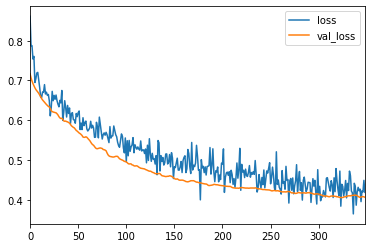

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [38]:
nn_pred = model.predict_classes(X_test)

In [39]:
print(classification_report(y_test,nn_pred))
print(confusion_matrix(y_test,nn_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.83      0.83      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

[[36  8]
 [ 8 39]]
